# **Analyzing NFL Defensive Player Performance Using ML Techniques**
By: Brynne DuBois

Python - [NFL Big Data Bowl 2024](https://www.kaggle.com/competitions/nfl-big-data-bowl-2024)

# Introduction
With the emergence of machine learning (ML) and artificial intelligence (AI) technologies, there are many new applications for use that can be explored. One of these applications is within American Football analytics. The theme of this year's NFL Big Data Bowl is tackling, which provides the opportunity to analzye the defensive side of the ball and create new metrics that add meaning and predictive capablities to any given scenario.

This project utilizes Next Gen Stats madee available to competition partcipants that include player tracking data from weeks 1-9 of the 2022 NFL season. Some highlights of the data made available are player and game stats including forced fumble, missed tackle, fumble, speed, acceleraton, and body weight for all players on a field during a given play. In addition to these pieces of data, we are also given the position of the ball on the field, which is critical to determining the liklihood of a tackle being made.

The goal of this solution is to provide novel insights that can improve a team's defensive strategy while also contributing the open-source community within the NFL and American football analyttics spaces.

# Approach
My initial approach was to load in the data, clean it, and process it, which is typical for any data analytics project. The first step was to become familiar with the data and identify data points that would be the most useful in working towards a solution. The first task I did, which is not included in my final solution, was graphing and animating plays to understand how these data looks from a mathematical context. I'll dive into his a little more in the challenges section, but I have never analyzed football data so looking at it from a mathemtical standpoint was a shift in mindset that had to be accomplished. Once I understood how to translate play details into a mathematical context, I was ready to start making use of the data.

The approach I followed was the following:
1. Extract and clean data
2. Explore and understand the data
3. Utilize feature engineering to generate new metrics and discover the importance of current ones
4. Split data into test and training sets
5. Determine what model produces the best accuracy
6. Analyze and interpret results

# Challenges
The largest challenge I faced in this endveavor was a lack of experience working with football data. Though I am currently a data analyst with a math and computer science background and have worked for 2 college football teams, I have never worked with football data as a data analyst/scientist. I was a student worker for the Notre Dame Football recruiting office and more recently served as the Assistant Director of Recruiting for LSU Football, and though I was curious about the data analytics surrounding these teams, I never had the opportunity to act on that interest because I was in another department. This competition was the perfect chance for me to combine my separate experiences in football and data analytics into one, learning and having fun along the way.

In [1]:
# Load in packages needed
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, roc_curve, auc, accuracy_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from datetime import datetime 
import warnings  

warnings.filterwarnings('ignore')

# Step 1: Data Extraction and Cleansing
The first step that needs to be taken in order to analyze the data is reading each CSV file into a pandas dataframe for further analysis. I will then create a combined dataframe utlizing the games, players, plays, and tackles data to get everything into one place.

Though my initial approach does not make use of the tracking data, yet, I will read this in for future use.


In [2]:
# Import data from CSV files
games = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/games.csv")
players  = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/players.csv")
plays = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/plays.csv")
tackles = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/tackles.csv")
week1 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/tracking_week_1.csv")
week2 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/tracking_week_2.csv")
week3 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/tracking_week_3.csv")
week4 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/tracking_week_4.csv")
week5 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/tracking_week_5.csv")
week6 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/tracking_week_6.csv")
week7 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/tracking_week_7.csv")
week8 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/tracking_week_8.csv")
week9 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2024/tracking_week_9.csv")

# Combine tracking data
tracking = pd.concat([week1, week2, week3, week4, week5, week6, week7, week8, week9])

# Create unique IDs for applicable dataframes
tackles["gamePlayId"] = tackles["gameId"] + tackles["playId"]
plays["gamePlayId"] = plays["gameId"] + plays["playId"]


# Step 2: Explore and Understand the Data

I will explore each of the datasets, add features as needed, and vizualize different data points to help me do that.

In [3]:
# Preview datasets of interest
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23


In [4]:
players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [5]:
players.shape[0]

1683

In [6]:
plays.head()

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,gamePlayId
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN,2022104445
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN,2022094229
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN,2022092259
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN,2022102219
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN,2022093272


In [7]:
tackles.head()

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,gamePlayId
0,2022090800,101,42816,1,0,0,0,2022090901
1,2022090800,393,46232,1,0,0,0,2022091193
2,2022090800,486,40166,1,0,0,0,2022091286
3,2022090800,646,47939,1,0,0,0,2022091446
4,2022090800,818,40107,1,0,0,0,2022091618


In [8]:
tracking.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN


From the above outputs, we are able to see every column within each dataframe. Immediate columns of interest to me are forcedFumble, assist, pff_missedTackle, and tackle.

In [9]:
# Describe each data frame for quick insights
games.describe()

,gameId,season,week,homeFinalScore,visitorFinalScore
count,1.360000e+02,136.0,136.000000,136.000000,136.000000
mean,2.022099e+09,2022.0,4.845588,22.669118,20.948529
std,5.996614e+03,0.0,2.567254,8.659874,9.731446
min,2.022091e+09,2022.0,1.000000,3.000000,0.000000
25%,2.022093e+09,2022.0,3.000000,17.000000,14.750000
50%,2.022101e+09,2022.0,5.000000,22.500000,20.000000
75%,2.022102e+09,2022.0,7.000000,27.000000,27.000000
max,2.022111e+09,2022.0,9.000000,49.000000,48.000000


In [10]:
players.describe()

,nflId,weight
count,1683.000000,1683.000000
mean,48221.702317,245.724302
std,5217.040133,47.119299
min,25511.000000,153.000000
25%,44828.500000,205.000000
50%,47872.000000,236.000000
75%,53471.500000,290.000000
max,55241.000000,380.000000


In [11]:
plays.describe()

,gameId,playId,ballCarrierId,quarter,down,yardsToGo,yardlineNumber,preSnapHomeScore,preSnapVisitorScore,passLength,...,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulNFLId1,foulNFLId2,gamePlayId
count,1.248600e+04,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,5634.000000,...,12149.000000,12486.000000,12486.000000,12486.000000,12486.000000,12486.000000,12485.000000,592.000000,25.00000,1.248600e+04
mean,2.022099e+09,1986.603476,48072.271664,2.550136,1.727054,8.469085,29.573122,11.170671,9.862967,5.455982,...,0.603845,0.556236,0.443764,0.000110,-0.000110,2.258360,0.297367,47759.856419,50000.56000,2.022101e+09
std,5.953106e+03,1174.657363,4648.681597,1.136714,0.793536,3.927737,12.446971,9.442045,9.142307,8.258211,...,0.237096,0.287751,0.287751,0.036748,0.036748,1.619769,1.194641,5010.592593,3494.05977,6.048135e+03
min,2.022091e+09,54.000000,25511.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-9.000000,...,0.005607,0.001049,0.000825,-0.521181,-0.471527,-2.366872,-9.986150,33107.000000,43586.00000,2.022091e+09
25%,2.022093e+09,954.000000,44860.000000,2.000000,1.000000,6.000000,21.000000,3.000000,0.000000,0.000000,...,0.447226,0.331557,0.207915,-0.011382,-0.011799,1.055965,-0.437525,43572.750000,47790.00000,2.022095e+09
50%,2.022101e+09,1990.500000,47789.000000,3.000000,2.000000,10.000000,30.000000,10.000000,7.000000,4.000000,...,0.584451,0.585621,0.414379,0.000008,-0.000008,2.031321,0.112532,47793.500000,48089.00000,2.022103e+09
75%,2.022102e+09,2989.000000,52733.000000,4.000000,2.000000,10.000000,40.000000,17.000000,16.000000,9.000000,...,0.792913,0.792085,0.668443,0.011799,0.011382,3.451942,0.899947,53063.000000,52553.00000,2.022105e+09
max,2.022111e+09,5096.000000,55158.000000,5.000000,4.000000,38.000000,50.000000,49.000000,48.000000,61.000000,...,0.996206,0.999175,0.998951,0.471527,0.521181,6.558894,8.698986,55157.000000,54650.00000,2.022115e+09


In [12]:
tackles.describe()

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,gamePlayId
count,1.742600e+04,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,1.742600e+04
mean,2.022099e+09,1982.974578,47602.719442,0.569207,0.315276,0.005681,0.119936,2.022101e+09
std,5.978775e+03,1170.990596,4846.585868,0.495201,0.464639,0.075161,0.324896,6.073165e+03
min,2.022091e+09,54.000000,33131.000000,0.000000,0.000000,0.000000,0.000000,2.022091e+09
25%,2.022093e+09,952.000000,43797.000000,0.000000,0.000000,0.000000,0.000000,2.022095e+09
50%,2.022101e+09,1991.000000,46669.000000,1.000000,0.000000,0.000000,0.000000,2.022103e+09
75%,2.022102e+09,2981.750000,52546.000000,1.000000,1.000000,0.000000,0.000000,2.022105e+09
max,2.022111e+09,5096.000000,55241.000000,1.000000,1.000000,1.000000,1.000000,2.022115e+09


From this output, we see that the average player weight is 245, the average tackle probability is 56.9%, the average probablity of an assist is 31.5%, the average forced fumble probablity is 0.57%, and the average missed tackle probablity is ~12%. I call out these items because these are data points I'm the most interested in.

Now that I've explored the individual dataframes, I'm going to combine them into one for easier processing and analysis. I will do this using the primary keys of nflId, playId, and gameId across each dataframe.

In [13]:
# Merge players and tackles dataframes
combinedData = pd.merge(tackles, players, on="nflId")

# Merge with games
combinedData = pd.merge(combinedData, games, on="gameId")

# Merge with plays
combinedData = pd.merge(combinedData, plays, on=["gameId","playId"])

# See output to confirm dataframes were properly combined
combinedData.head()

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,gamePlayId_x,height,weight,...,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,gamePlayId_y
0,2022090800,101,42816,1,0,0,0,2022090901,5-11,184,...,0.600181,-0.014850,0.014850,2.126690,0.562363,NaN,NaN,NaN,NaN,2022090901
1,2022090800,1102,42816,1,0,0,0,2022091902,5-11,184,...,0.831442,0.001122,-0.001122,3.894043,-0.132479,NaN,NaN,NaN,NaN,2022091902
2,2022090800,1102,52492,0,0,0,1,2022091902,6-5,252,...,0.831442,0.001122,-0.001122,3.894043,-0.132479,NaN,NaN,NaN,NaN,2022091902
3,2022090800,2043,42816,1,0,0,0,2022092843,5-11,184,...,0.619052,-0.024323,0.024323,2.479935,0.674549,NaN,NaN,NaN,NaN,2022092843
4,2022090800,2527,42816,1,0,0,0,2022093327,5-11,184,...,0.815528,-0.031648,0.031648,0.267979,1.395048,NaN,NaN,NaN,NaN,2022093327


In [14]:
# Output the number of rows
combinedData.shape[0]

17426

In [15]:
# Use dttypes to do a quick check of the datatype for each column
# If there are glaring issues (something that should be numerical is a string or vice versa), I will need to convert
combinedData.dtypes

gameId                                int64
playId                                int64
nflId                                 int64
tackle                                int64
assist                                int64
forcedFumble                          int64
pff_missedTackle                      int64
gamePlayId_x                          int64
height                               object
weight                                int64
birthDate                            object
collegeName                          object
position                             object
displayName                          object
season                                int64
week                                  int64
gameDate                             object
gameTimeEastern                      object
homeTeamAbbr                         object
visitorTeamAbbr                      object
homeFinalScore                        int64
visitorFinalScore                     int64
ballCarrierId                   

The glaring issue with this datatype analysis is that height is an object, not an integer. I will write a function to convert this data point, ignoring any NA heights.

In [16]:
# Convert the height column to inches
def heightInInches(height):
    if isinstance(height, str):
        parts = height.split('-')
        if len(parts) == 2:
            feet, inches = int(parts[0]), int(parts[1])
            return feet * 12 + inches
    return height # if not string, return as is

# Create a new column using this function
combinedData["heightInInches"] = combinedData["height"].apply(heightInInches)


I will now redescibe the combined dataframe to see what the average height is.

In [17]:
combinedData.describe()

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,gamePlayId_x,weight,season,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulNFLId1,foulNFLId2,gamePlayId_y,heightInInches
count,1.742600e+04,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,1.742600e+04,17426.000000,17426.0,...,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17424.000000,761.000000,31.000000,1.742600e+04,17426.000000
mean,2.022099e+09,1982.974578,47602.719442,0.569207,0.315276,0.005681,0.119936,2.022101e+09,232.930391,2022.0,...,0.558989,0.441011,-0.000067,0.000067,2.215160,0.242920,47765.601840,49575.258065,2.022101e+09,73.486859
std,5.978775e+03,1170.990596,4846.585868,0.495201,0.464639,0.075161,0.324896,6.073165e+03,39.927658,0.0,...,0.287481,0.287481,0.034437,0.034437,1.585774,1.136264,4987.646861,3570.559657,6.073165e+03,2.190753
min,2.022091e+09,54.000000,33131.000000,0.000000,0.000000,0.000000,0.000000,2.022091e+09,170.000000,2022.0,...,0.001049,0.000825,-0.521181,-0.410824,-2.366872,-9.986150,33107.000000,43586.000000,2.022091e+09,68.000000
25%,2.022093e+09,952.000000,43797.000000,0.000000,0.000000,0.000000,0.000000,2.022095e+09,200.000000,2022.0,...,0.336928,0.203547,-0.010758,-0.010872,1.046297,-0.445271,43503.000000,46527.000000,2.022095e+09,72.000000
50%,2.022101e+09,1991.000000,46669.000000,1.000000,0.000000,0.000000,0.000000,2.022103e+09,227.000000,2022.0,...,0.587105,0.412895,0.000007,-0.000007,1.992672,0.063363,47791.000000,47996.000000,2.022103e+09,73.000000
75%,2.022102e+09,2981.750000,52546.000000,1.000000,1.000000,0.000000,0.000000,2.022105e+09,252.000000,2022.0,...,0.796453,0.663072,0.010872,0.010758,3.360313,0.818275,53063.000000,53046.000000,2.022105e+09,75.000000
max,2.022111e+09,5096.000000,55241.000000,1.000000,1.000000,1.000000,1.000000,2.022115e+09,379.000000,2022.0,...,0.999175,0.998951,0.410824,0.521181,6.556614,7.130048,55157.000000,54650.000000,2.022115e+09,80.000000


The new column was added at the end of the dataframe, so I'm going to move it to be next to the original height column.

In [18]:
heightInInchesCol = combinedData.pop('heightInInches')
combinedData.insert(8, heightInInchesCol.name, heightInInchesCol)

# Check that this worked
combinedData.head()

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,gamePlayId_x,heightInInches,height,...,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,gamePlayId_y
0,2022090800,101,42816,1,0,0,0,2022090901,71,5-11,...,0.600181,-0.014850,0.014850,2.126690,0.562363,NaN,NaN,NaN,NaN,2022090901
1,2022090800,1102,42816,1,0,0,0,2022091902,71,5-11,...,0.831442,0.001122,-0.001122,3.894043,-0.132479,NaN,NaN,NaN,NaN,2022091902
2,2022090800,1102,52492,0,0,0,1,2022091902,77,6-5,...,0.831442,0.001122,-0.001122,3.894043,-0.132479,NaN,NaN,NaN,NaN,2022091902
3,2022090800,2043,42816,1,0,0,0,2022092843,71,5-11,...,0.619052,-0.024323,0.024323,2.479935,0.674549,NaN,NaN,NaN,NaN,2022092843
4,2022090800,2527,42816,1,0,0,0,2022093327,71,5-11,...,0.815528,-0.031648,0.031648,0.267979,1.395048,NaN,NaN,NaN,NaN,2022093327


# Step 3: Utilize feature engineering to generate new metrics and discover the importance of current ones

I want to start by exploring the correlation between different data points. In order to do this, I want to create an age data point.

In [19]:
# Convert all birthdates to a uniform format
combinedData["birthDate"] = pd.to_datetime(combinedData["birthDate"], format="mixed")
from datetime import date

today = date.today()
# Create a function to calculate age
def getAge(dob):
    return today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))

# Create a new column using this function
combinedData["age"] = combinedData["birthDate"].apply(getAge)

# Check that the conversion worked
combinedData[["birthDate", "age"]]

# Position column
ageCol = combinedData.pop("age")
combinedData.insert(10, ageCol.name, ageCol)

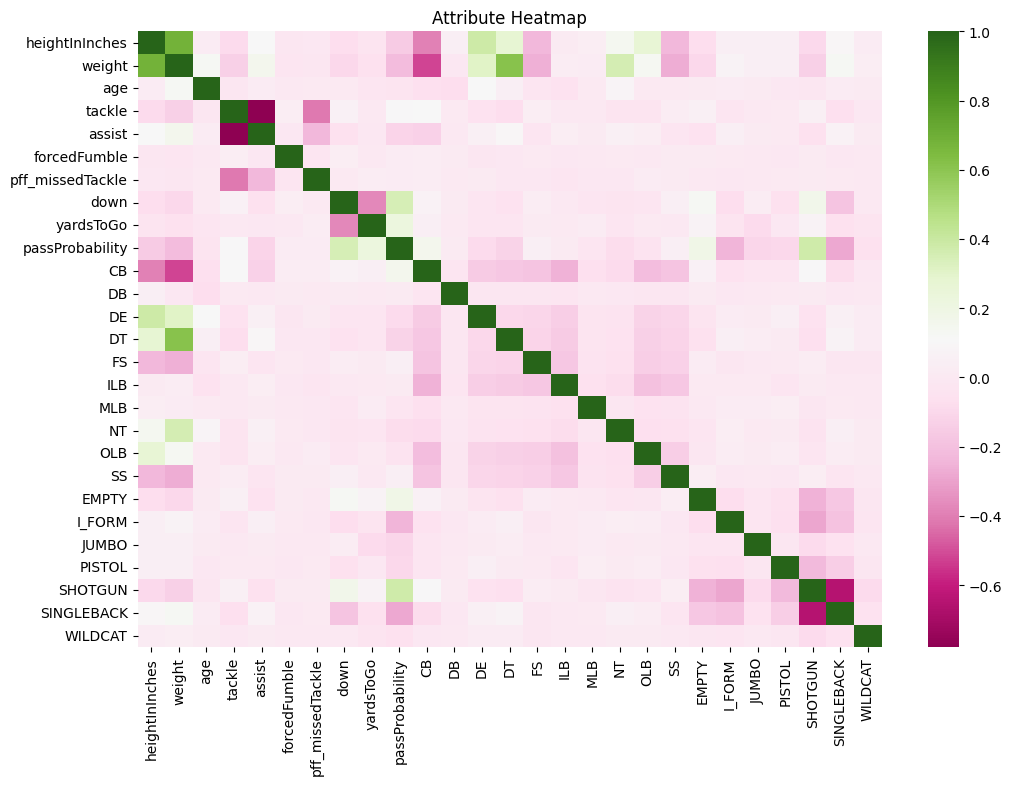

In [20]:
# Select features
features = ["heightInInches", "weight", "age", "position", "tackle", "assist", "forcedFumble", "pff_missedTackle","down", "yardsToGo", "offenseFormation", "passProbability"]

corrDf = combinedData[features]

# Convert position to dummy variables
dummyPositions = pd.get_dummies(corrDf["position"])
corrDf = pd.concat([corrDf, dummyPositions], axis=1)

dummyFormations = pd.get_dummies(corrDf["offenseFormation"])
corrDf = pd.concat([corrDf, dummyFormations], axis=1)

# Remove the categorical position column
corrDf.pop("position")
corrDf.pop("offenseFormation")

# Calculate the correlation matrix
corrMatrix = corrDf.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corrMatrix, annot=False, cmap="PiYG")
plt.title("Attribute Heatmap")
plt.show()

The heatmap above shows the correlation coefficients between the chosen features without our dataset. Dark green indicates a positive correlation while dark pink indicates negative correlation. The diagonal line through the center shows that each feature has a perfect correlation with itself, which is expected.

From this output, we see the following positive correlations:
1. Weight and height: as weight increases, so does height
2. Weight and DT: this position is one of the largest defensive players, so it's expected they would weigh the most
3. Weight and DE: see above
4. Height and DT: this position is one of the largest defensive players, so it's expected they would be among the tallest
5. Height and DE: see above

We also see the following negative correlations:
1. Tackle and assist: as tackles increase, the credited assists would decrease
2. Yards to go and down: as the # of downs increase, yards to go increases
3. Height and CB: this position is a skill position and one of the smaller players on the field giving them a tendency to be shorter
4. Height and FS: see above
5. Height and SS: see above
6. Weight and CB: his position is a skill position and one of the smaller players on the field giving them a tendency to weigh less
7. Weight and FS: see above
8. Weight and SS: see above
9. Tackle and missed tackle: if a tackle is made, the missed tackle count will be lower and vice versa
10. Assist and missed tackle: if an assist is made, the missed tackle count will be lower and vice versa

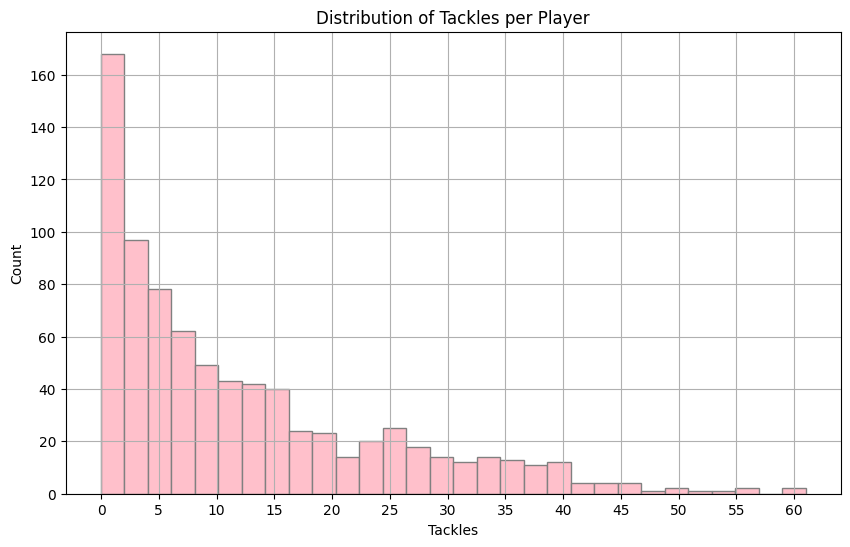

In [21]:
playerTackles = combinedData.groupby(["nflId"])["tackle"].agg("sum")

# Creating a DataFrame by passing a dictionary
playerrTacklesDict = {"nflId2": playerTackles.index, "tackles": playerTackles}
combinedPlayerTackles = pd.DataFrame(playerrTacklesDict).reset_index()
combinedPlayerTackles = combinedPlayerTackles.drop(columns=["nflId2"], axis=1)

# Plotting using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(combinedPlayerTackles["tackles"], bins=30, color="pink", edgecolor="gray")
plt.title("Distribution of Tackles per Player")
plt.xlabel("Tackles")
plt.ylabel("Count")
plt.xticks(np.arange(min(combinedPlayerTackles["tackles"]), max(combinedPlayerTackles["tackles"])+1, 5.0))
plt.grid(True)
plt.show()

The graph above shows that a majority of players get less than 15 tackles credited. Let's calculate the percentage:

In [22]:
lowTackles = combinedPlayerTackles[combinedPlayerTackles["tackles"] < 16].count()
highTackles = combinedPlayerTackles[combinedPlayerTackles["tackles"] > 15].count()

totalPlayers = lowTackles.tackles + highTackles.tackles
percentLowTackles = (lowTackles.tackles / totalPlayers)*100
print(str(percentLowTackles) + "%")


70.0%


Let's do the same analysis with assists:

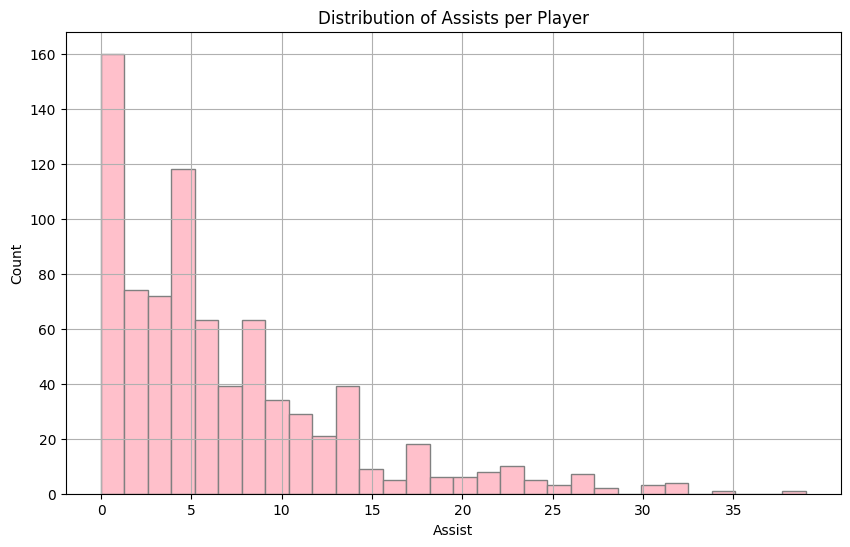

In [23]:
playerAssists = combinedData.groupby(["nflId"])["assist"].agg("sum")

# Creating a DataFrame by passing a dictionary
playerAssistDict = {"nflId3": playerAssists.index, "assists": playerAssists}
combinedPlayerAssists = pd.DataFrame(playerAssistDict).reset_index()
combinedPlayerAssists = combinedPlayerAssists.drop(columns=["nflId3"], axis=1)

# Plotting using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(combinedPlayerAssists["assists"], bins=30, color="pink", edgecolor="gray")
plt.title("Distribution of Assists per Player")
plt.xlabel("Assist")
plt.ylabel("Count")
plt.xticks(np.arange(min(combinedPlayerAssists["assists"]), max(combinedPlayerAssists["assists"])+1, 5.0))
plt.grid(True)
plt.show()

In [24]:
lowAssists = combinedPlayerAssists[combinedPlayerAssists["assists"] < 16].count()
highAssists = combinedPlayerAssists[combinedPlayerAssists["assists"] > 15].count()

totalPlayers2 = lowAssists.assists + highAssists.assists
percentLowAssists = (lowAssists.assists / totalPlayers2)*100
print(str(percentLowAssists) + "%")


90.125%


With this analysis, we see it is more common for players to have less than 15 or less assists compared to tackles.

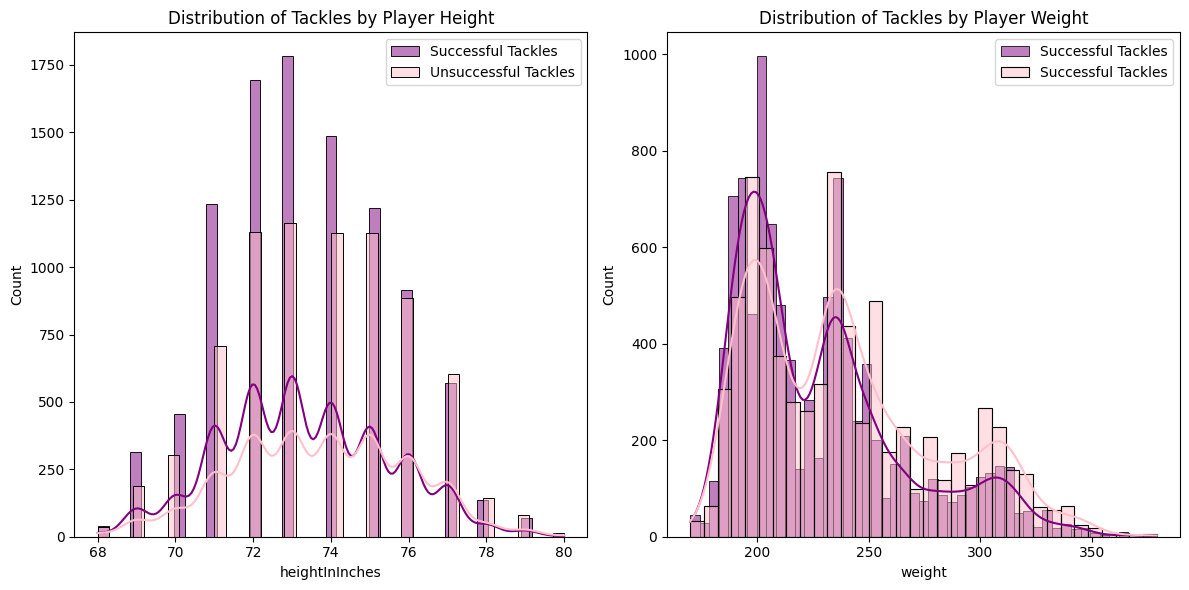

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(combinedData[combinedData["tackle"] == 1]["heightInInches"], kde=True, color="purple", label="Successful Tackles")
sns.histplot(combinedData[combinedData["tackle"] == 0]["heightInInches"], kde=True, color="pink", label="Unsuccessful Tackles")
plt.title("Distribution of Tackles by Player Height")
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(combinedData[combinedData["tackle"] == 1]["weight"], kde=True, color="purple", label="Successful Tackles")
sns.histplot(combinedData[combinedData["tackle"] == 0]["weight"], kde=True, color="pink", label="Successful Tackles")
plt.title("Distribution of Tackles by Player Weight")
plt.legend()

plt.tight_layout()
plt.show()

Full Disclosure: I attempted to use FeatureTools and I couldn't get it to work successfully. This is a tool I would like to use in the future, but to ensure success, I'm going to brainstorm and create my own features.

I already created some features previously, but after further analysis I would like to add tackle and assist success rates, due to their negative correlation, and BMI, due to height and weight's positive correlation.

1. tackleSuccessRate = sum of tackles / (sum of tackles + missed tackles)
2. assistSucessRate = sum of assists / (sum of assists + missed tackles)
3. BMI = 703 * weight in pounds / (height in inches)^2

In [26]:
combinedData["tackleSuccess"] = combinedData.groupby("nflId")["tackle"].transform(lambda x : x.loc[x==1].count())
combinedData["tackleFail"] = combinedData.groupby("nflId")["tackle"].transform(lambda x : x.loc[x==0].count())
combinedData["tackleSuccessRate"] = combinedData["tackleSuccess"] / (combinedData["tackleFail"] + combinedData["tackleSuccess"]) * 100


combinedData["assistSuccess"] = combinedData.groupby("nflId")["assist"].transform(lambda x : x.loc[x==1].count())
combinedData["assistFail"] = combinedData.groupby("nflId")["assist"].transform(lambda x : x.loc[x==0].count())
combinedData["assistSuccessRate"] = combinedData["assistSuccess"] / (combinedData["tackleFail"] + combinedData["assistSuccess"]) * 100

def calculateBmi(weight, heightInInches):
    # BMI formula: 703 * weight in pounds / (height in inches)^2
    return 703 * weight / (heightInInches ** 2)

combinedData['bmi'] = combinedData.apply(lambda row: calculateBmi(row['weight'], row['heightInInches']), axis=1)



The features I will be focusing on are: BMI, tackleSuccessRate, assistSuccessRate, forcedFumble, tackle, assist, and quarter





# Step 4: Split data into test and training sets
I'll start by deciding what elements to use in my feature matrix. I want to use all of the metrics I've created as well as meetrics like tackle, assist, and forcedFumble those have some correlation to eachother. Finally, I'll also add in quarter to explore if game duration has an impact on the probability of a tackle.

In [27]:
featureData = combinedData[["bmi", "age", "tackleSuccessRate", "assistSuccessRate", "forcedFumble", "tackle", "assist", "quarter"]]
featureData = featureData.fillna(0)
featureData.head()

,bmi,age,tackleSuccessRate,assistSuccessRate,forcedFumble,tackle,assist,quarter
0,25.659988,32.0,55.555556,46.666667,0,1,0,1
1,25.659988,32.0,55.555556,46.666667,0,1,0,2
2,29.879575,25.0,58.333333,44.444444,0,0,0,2
3,25.659988,32.0,55.555556,46.666667,0,1,0,3
4,25.659988,32.0,55.555556,46.666667,0,1,0,3


In [28]:
# Splitting the dataset into training, validation, and test sets
train, test = train_test_split(featureData, test_size=0.2, random_state=42)
val, test = train_test_split(test, test_size=0.5, random_state=42)

# Apply get_dummies to each split separately
X_train = pd.get_dummies(train.drop('tackle', axis=1), drop_first=True)
y_train = train['tackle']

X_val = pd.get_dummies(val.drop('tackle', axis=1), drop_first=True)
y_val = val['tackle']

X_test = pd.get_dummies(test.drop('tackle', axis=1), drop_first=True)
y_test = test['tackle']

# Standardize the numerical features
# Note: Only standardize numerical columns. For simplicity, I'm assuming all columns are now either numerical or one-hot encoded
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


### Model 1: Support Vector Classifier
I'll be starting with an SVC because I have worked with this type of model before. Once I gain confidence in my ability to input football-specific data, I'll branch out to other supervised learning models.

In [29]:
# Create a Support Vector Classifier
svc = SVC()

# Train the model
svc.fit(X_train, y_train)

# Make predictions
y_pred = svc.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 88.00917957544463


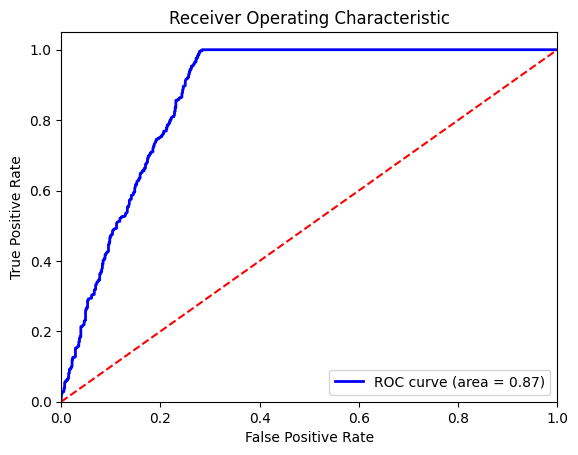

In [30]:
y_score = svc.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_score)
roc_auc_svc = roc_auc_score(y_test, y_score)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_svc, tpr_svc, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Model 2: Naive Bayes Model

In [31]:
# Create a Gaussian Naive Bayes
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions
y_pred_gnb = gnb.predict(X_test)

# Evaluate the accuracy of the model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)*100
print(f"Model Accuracy: {accuracy_gnb}")

Model Accuracy: 87.95180722891565


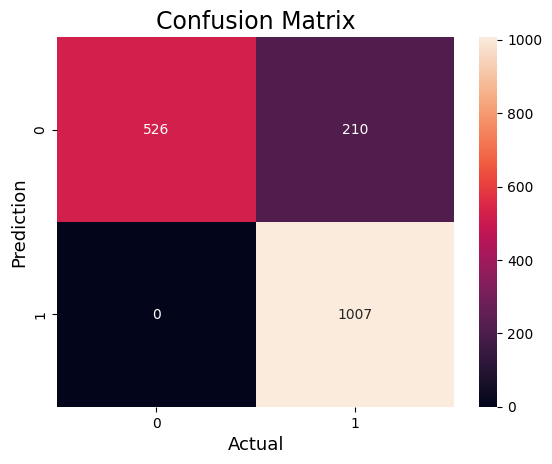

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gnb)

sns.heatmap(cm, 
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### Model 3: Random Forest Classifier

In [33]:
# Create the RF Classifier
rf_clf = RandomForestClassifier(n_estimators=100)

# Train the model
rf_clf.fit(X_train, y_train)

# Make Predictions
y_pred_rf = rf_clf.predict(X_test)

# Predict probabilities
y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

# Calculate Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)*100
print(f"Model Accuracy: {accuracy_rf}")



Model Accuracy: 85.77165806081469


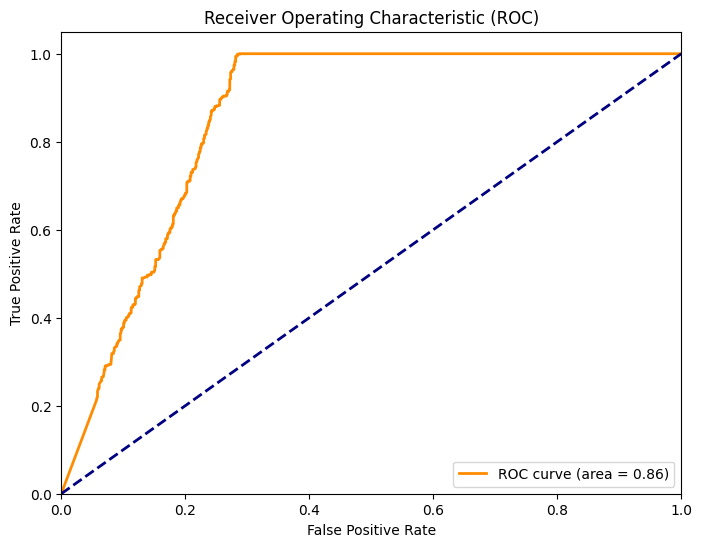

In [34]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

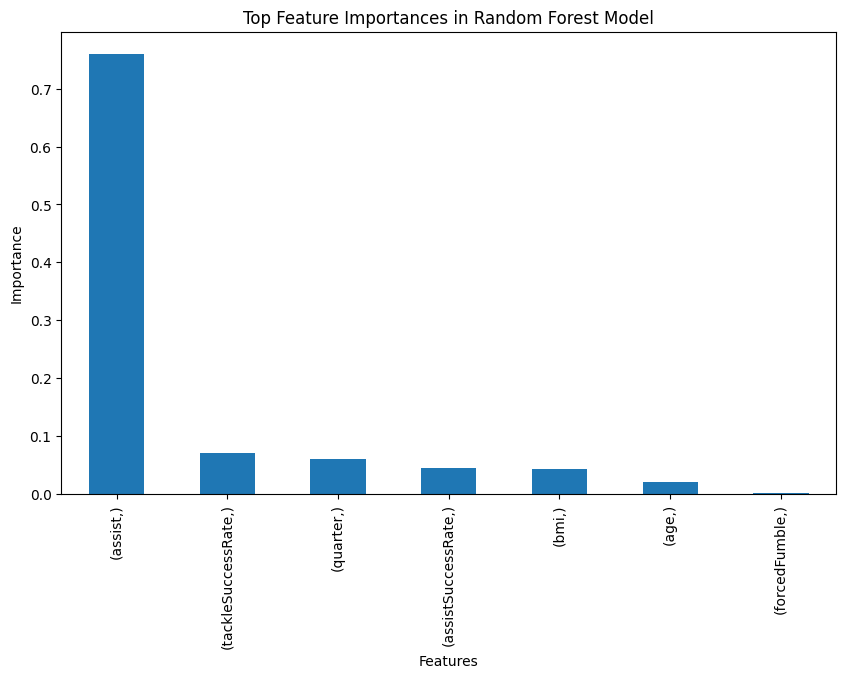

In [35]:
feature_importance = rf_clf.feature_importances_
feature_names = [["bmi", "age", "tackleSuccessRate", "assistSuccessRate", "forcedFumble", "assist", "quarter"]]
importances = pd.Series(feature_importance, index=feature_names)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Top Feature Importances in Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

### Model 4: K Nearest Neighbors

In [36]:
# Create the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7) 

# Train the model
knn.fit(X_train, y_train) 

# Make predictions
y_pred_knn = knn.predict(X_test)

# Calculate Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)*100
print(f"Model Accuracy: {accuracy_knn}")

Model Accuracy: 86.28800917957544


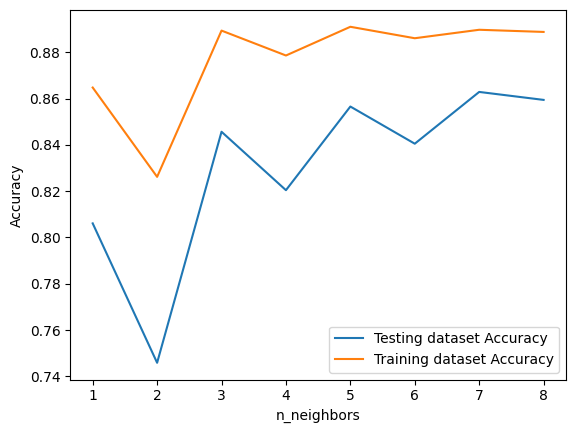

In [37]:
neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute training and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
  
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show()

# Step 5: Determine what model produces the best accuracy


Based on the 4 types of models used, these were their accuracy rates:

In [38]:
accuracy = accuracy_score(y_test, y_pred)*100
print(f"SVM Accuracy: {accuracy}")

accuracy_gnb = accuracy_score(y_test, y_pred_gnb)*100
print(f"Naive Bayes Accuracy: {accuracy_gnb}")

accuracy_rf = accuracy_score(y_test, y_pred_rf)*100
print(f"Random Forest Accuracy: {accuracy_rf}")

accuracy_knn = accuracy_score(y_test, y_pred_knn)*100
print(f"K Nearest Neigbors Accuracy: {accuracy_knn}")

SVM Accuracy: 88.00917957544463
Naive Bayes Accuracy: 87.95180722891565
Random Forest Accuracy: 85.77165806081469
K Nearest Neigbors Accuracy: 86.28800917957544


The model with the highest accuracy was the SVM followed closely by the Naive Bayes. The Random Forest and K Nearest Neighbors also performed well, but there is a larger gap between them as the bottom 2 vs. the top 2.


# Step 6: Analyze and interpret results